In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
matplotlib.rcParams['font.family'] = 'serif'

In [3]:
memory_oracle_df     = pd.read_csv('memoryOraclePDA.txt' , names=['memory'])
memory_subtreePDA_df = pd.read_csv('memorySubtreePDA.txt', names=['memory'])
memory_subtreeFA_df  = pd.read_csv('memorySubtreeFA.txt' , names=['memory'])

In [4]:
memory_oracle_df ['memory']     = memory_oracle_df ['memory'] . apply ( lambda x : x / 1048576.0 )
memory_subtreePDA_df ['memory'] = memory_subtreePDA_df ['memory'] . apply ( lambda x : x / 1048576.0 )
memory_subtreeFA_df ['memory']  = memory_subtreeFA_df ['memory'] . apply ( lambda x : x / 1048576.0 )

In [5]:
tree_size_df =  pd.read_csv('sizetrees1_15.txt' , index_col=False,  sep=' ',
                            names=[ 'depth','nodes'])


In [6]:
tree_depth_df = tree_size_df[['depth']]
tree_nodes_df = tree_size_df[['nodes']]

In [7]:
oracle_df     = pd.read_csv('logOraclePDA.txt' , index_col=False,  sep=' ',
                            names=[ 'ignore1','build-time', 'ignore2', 'states', 'transitions','ignore3', 'querytime'])
oracle_df = oracle_df [['build-time', 'states', 'transitions', 'querytime']]

subtreePDA_df = pd.read_csv('logSubtreePDA.txt', index_col=False,  sep=' ',
                            names=[ 'ignore1','build-time', 'ignore2', 'states', 'transitions','ignore3', 'querytime'])
subtreePDA_df = subtreePDA_df [['build-time', 'states', 'transitions', 'querytime']]

subtreeFA_df  = pd.read_csv('logSubtreeFA.txt', index_col=False,  sep=' ',
                            names=[ 'ignore1','build-time', 'ignore2', 'states', 'transitions','ignore3', 'querytime'])
subtreeFA_df = subtreeFA_df [['build-time', 'states', 'transitions', 'querytime']]


In [8]:
buildtime_oracle_df     = oracle_df [['build-time']]
buildtime_subtreePDA_df = subtreePDA_df [['build-time']]
buildtime_subtreeFA_df  = subtreeFA_df [['build-time']]

In [9]:
faslepositives_df =  pd.read_csv('falsepositives.txt' , names=['false'])

## Graph for depth and number of nodes.

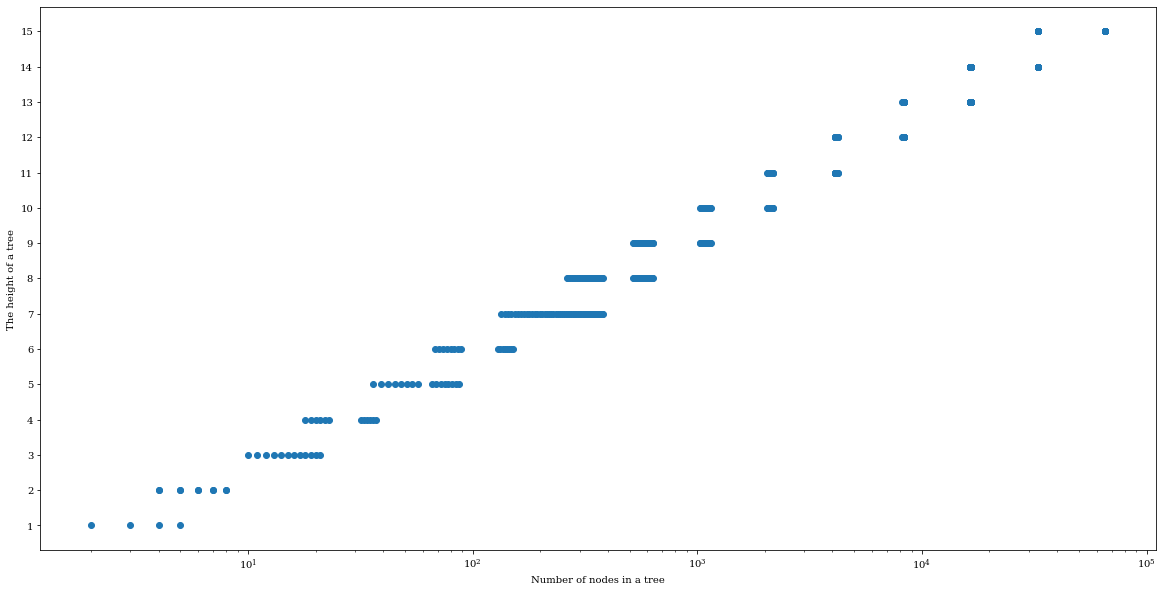

In [10]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes in a tree")
plt.ylabel("The height of a tree")
plt.scatter(tree_nodes_df['nodes'], tree_depth_df['depth'])
plt.xscale('log')
plt.yticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()

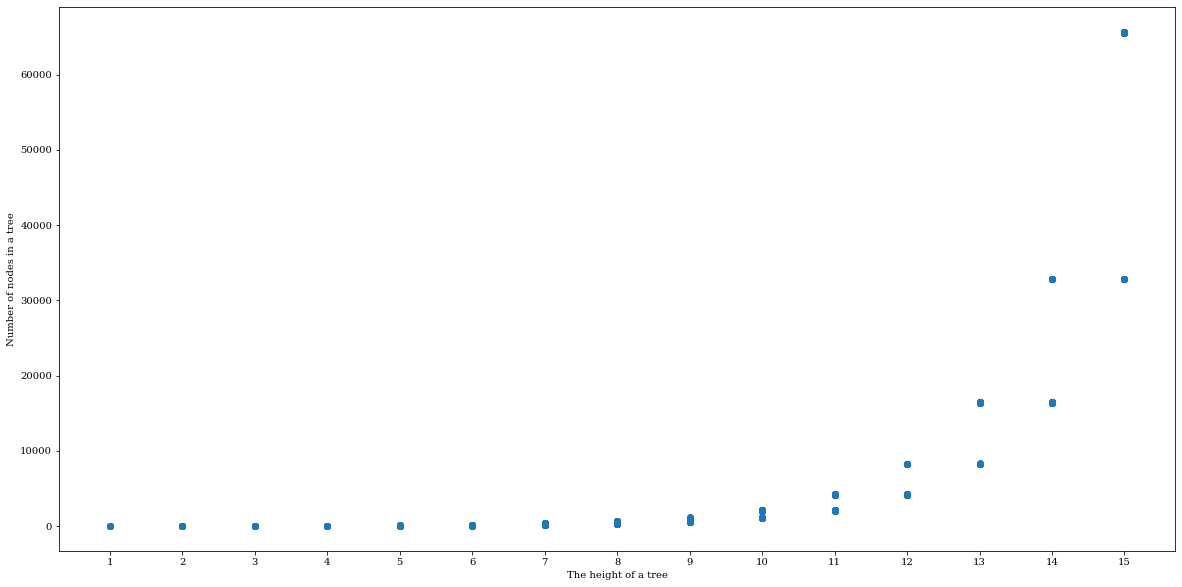

In [11]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Number of nodes in a tree")
plt.scatter( tree_depth_df['depth'], tree_nodes_df['nodes'])
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()

In [12]:
with PdfPages('info.pdf') as export_pdf:
    plt.rc('font', size=18)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Number of nodes in a tree")
    plt.scatter( tree_depth_df['depth'], tree_nodes_df['nodes'])
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

## Graph for number of transitions, states, and depth.

In [13]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Number of states")
plt.scatter(tree_depth_df['depth'], subtreeFA_df["states"], label = 'subtree FA')
plt.scatter(tree_depth_df['depth'], oracle_df["states"], label = 'subtree oracle PDA')
plt.scatter(tree_depth_df['depth'], subtreePDA_df["states"], label = 'subtree PDA')
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend( frameon=False)
plt.show()

In [14]:
with PdfPages('s-h.pdf') as export_pdf:
    plt.rc('font', size=18)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Number of states")
    plt.scatter(tree_depth_df['depth'], subtreeFA_df["states"], label = 'subtree FA')
    plt.scatter(tree_depth_df['depth'] + 0.1, oracle_df["states"], label = 'subtree oracle PDA')
    plt.scatter(tree_depth_df['depth'] + 0.2, subtreePDA_df["states"], label = 'subtree PDA')
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.legend( frameon=False)
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

In [15]:
with PdfPages('t-h.pdf') as export_pdf:
    plt.rc('font', size=18)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Number of transitions")
    plt.scatter(tree_depth_df['depth'], subtreeFA_df["transitions"], label = 'subtree FA')
    plt.scatter(tree_depth_df['depth'] + 0.1, oracle_df["transitions"], label = 'subtree oracle PDA')
    plt.scatter(tree_depth_df['depth'] + 0.2, subtreePDA_df["transitions"], label = 'subtree PDA')
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.yscale('log')
    plt.legend(frameon=False)
    export_pdf.savefig()
    plt.close()

In [16]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Number of transitions")
plt.bar(tree_depth_df['depth'], subtreeFA_df["transitions"], label = 'subtree FA', width = 0.25)
plt.bar(tree_depth_df['depth'] + 0.25, oracle_df["transitions"], label = 'subtree oracle PDA', width = 0.25)
plt.bar(tree_depth_df['depth'] + 0.5, subtreePDA_df["transitions"], label = 'subtree PDA', width = 0.25)
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(frameon=False)
plt.show()

## Graph for number of transitions, states, and number of nodes.

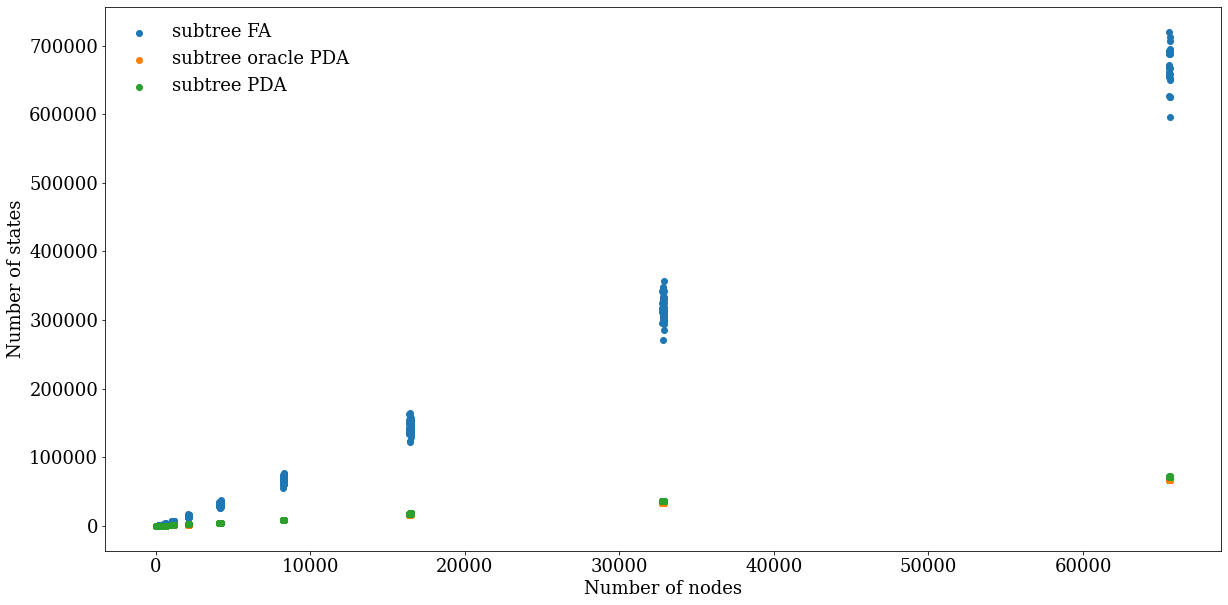

In [17]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes")
plt.ylabel("Number of states")
plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["states"], label = 'subtree FA')
plt.scatter(tree_nodes_df['nodes'], oracle_df["states"], label = 'subtree oracle PDA')
plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["states"], label = 'subtree PDA')
plt.legend(frameon=False)
plt.show()

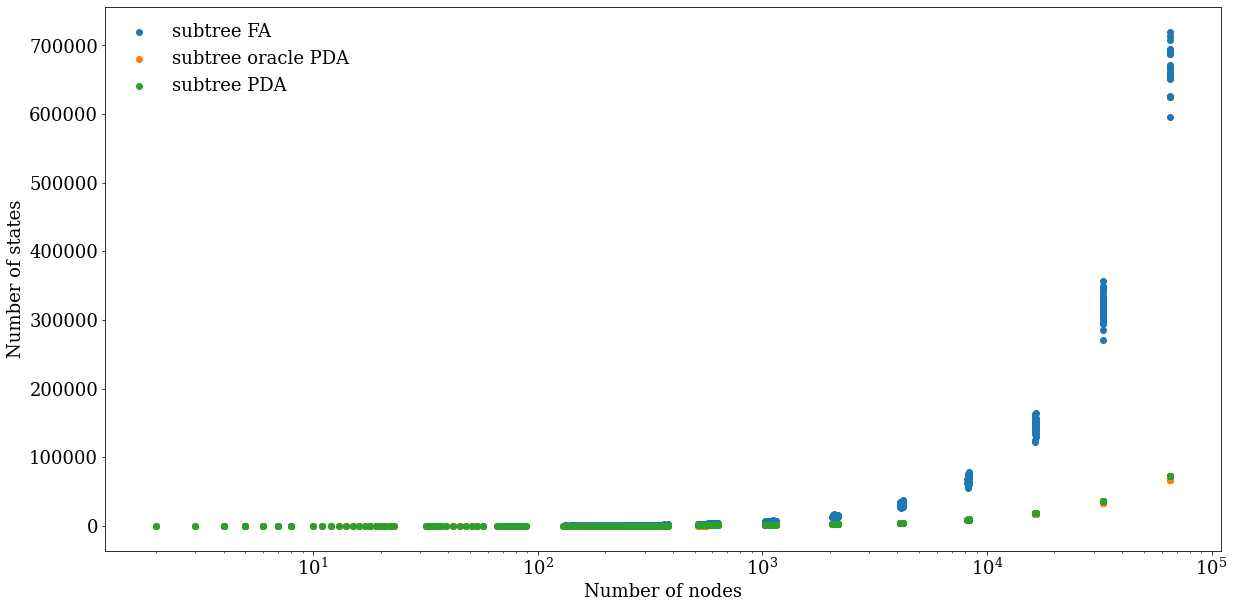

In [18]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes")
plt.ylabel("Number of states")
plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["states"], label = 'subtree FA')
plt.scatter(tree_nodes_df['nodes'], oracle_df["states"], label = 'subtree oracle PDA')
plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["states"], label = 'subtree PDA')
plt.xscale ('log')
plt.legend(frameon=False)
plt.show()

In [19]:
with PdfPages('s-s.pdf') as export_pdf:
    plt.rc('font', size=18)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("Number of nodes")
    plt.ylabel("Number of states")
    plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["states"], label = 'subtree FA')
    plt.scatter(tree_nodes_df['nodes'], oracle_df["states"], label = 'subtree oracle PDA')
    plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["states"], label = 'subtree PDA')
    plt.xscale ('log')
    plt.yscale ('log')
    plt.legend(frameon=False)
    export_pdf.savefig()
    plt.close()

In [20]:
with PdfPages('t-s.pdf') as export_pdf:
    plt.rc('font', size=18)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("Number of nodes")
    plt.ylabel("Number of transitions")
    plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["transitions"], label = 'subtree FA')
    plt.scatter(tree_nodes_df['nodes'], oracle_df["transitions"], label = 'subtree oracle PDA')
    plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["transitions"], label = 'subtree PDA')
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xscale('log')
    export_pdf.savefig()
    plt.close()

## Graph for false positives and depth.

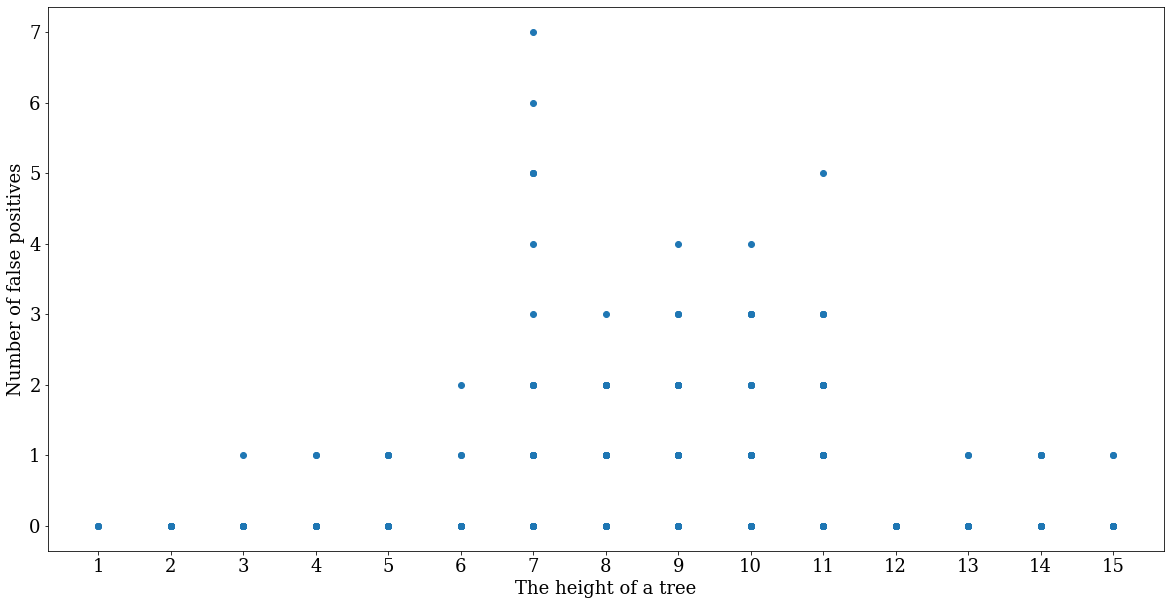

In [21]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Number of false positives")
plt.scatter(tree_depth_df['depth'], faslepositives_df["false"])
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()

## Graph for false positives and nodes.

In [22]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes")
plt.ylabel("Number of false positives")
plt.scatter(tree_nodes_df['nodes'], faslepositives_df["false"])
plt.xscale('log')
plt.show()

## Graph for query time and depth.

In [23]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Query time in ms")
plt.scatter(tree_depth_df['depth'], subtreeFA_df["querytime"], label = 'subtree FA')
plt.scatter(tree_depth_df['depth'], oracle_df["querytime"], label = 'subtree oracle PDA')
plt.scatter(tree_depth_df['depth'], subtreePDA_df["querytime"], label = 'subtree PDA')
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(frameon=False)
plt.show()

In [24]:
with PdfPages('qt-h.pdf') as export_pdf:
    plt.rc('font', size=16)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Query time in ms")
    plt.scatter(tree_depth_df['depth'], subtreeFA_df["querytime"], label = 'subtree FA')
    plt.scatter(tree_depth_df['depth'] + 0.1, oracle_df["querytime"], label = 'subtree oracle PDA')
    plt.scatter(tree_depth_df['depth'] + 0.2, subtreePDA_df["querytime"], label = 'subtree PDA')
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.legend(frameon=False)
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

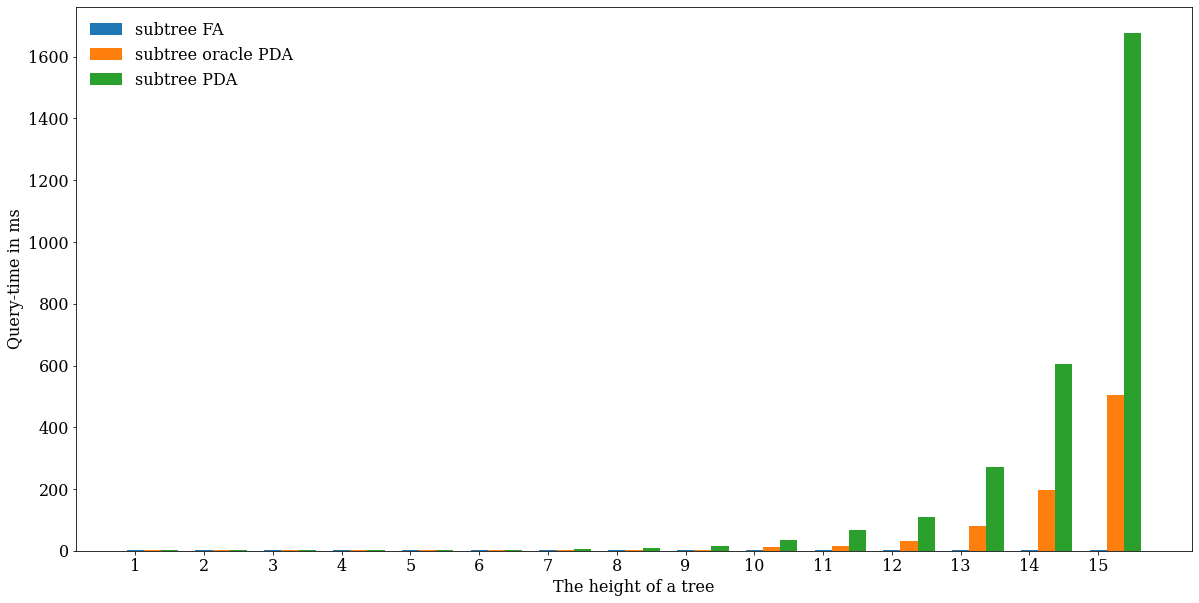

In [25]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Query-time in ms")
plt.bar(tree_depth_df['depth'], subtreeFA_df["querytime"], label = 'subtree FA',width=0.25)
plt.bar(tree_depth_df['depth']+0.25, oracle_df["querytime"], label = 'subtree oracle PDA',width=0.25)
plt.bar(tree_depth_df['depth']+0.5, subtreePDA_df["querytime"], label = 'subtree PDA',width=0.25)
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(frameon=False)
plt.show()

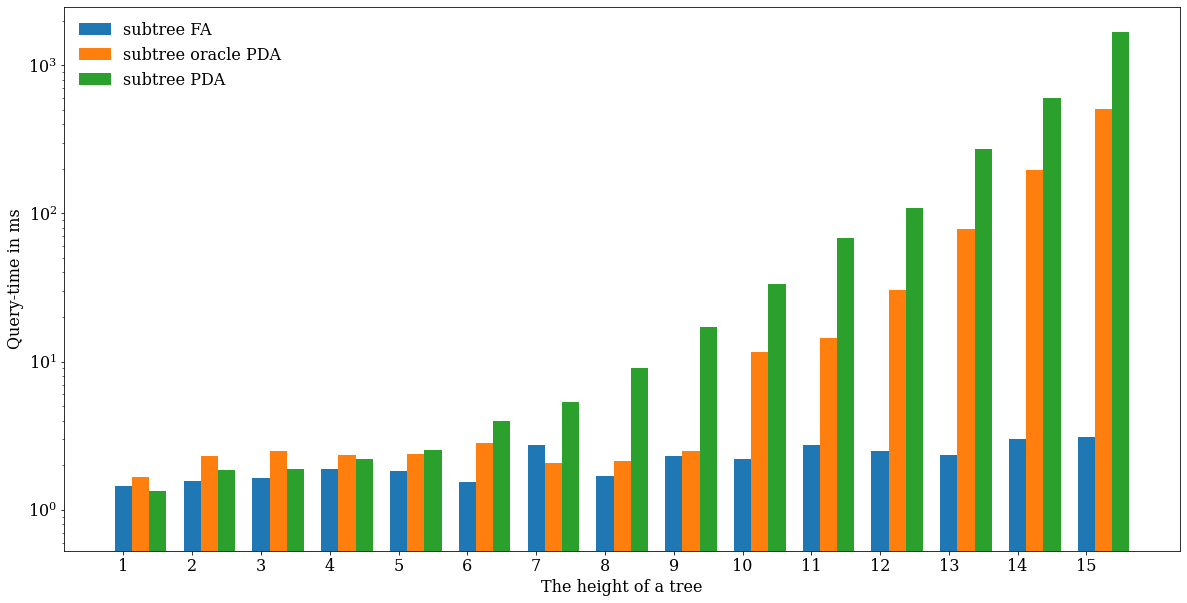

In [26]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Query-time in ms")
plt.bar(tree_depth_df['depth'], subtreeFA_df["querytime"], label = 'subtree FA',width=0.25)
plt.bar(tree_depth_df['depth']+0.25, oracle_df["querytime"], label = 'subtree oracle PDA',width=0.25)
plt.bar(tree_depth_df['depth']+0.5, subtreePDA_df["querytime"], label = 'subtree PDA',width=0.25)
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.yscale ('log')
plt.legend(frameon=False)
plt.show()

## Graph for query time and nodes.

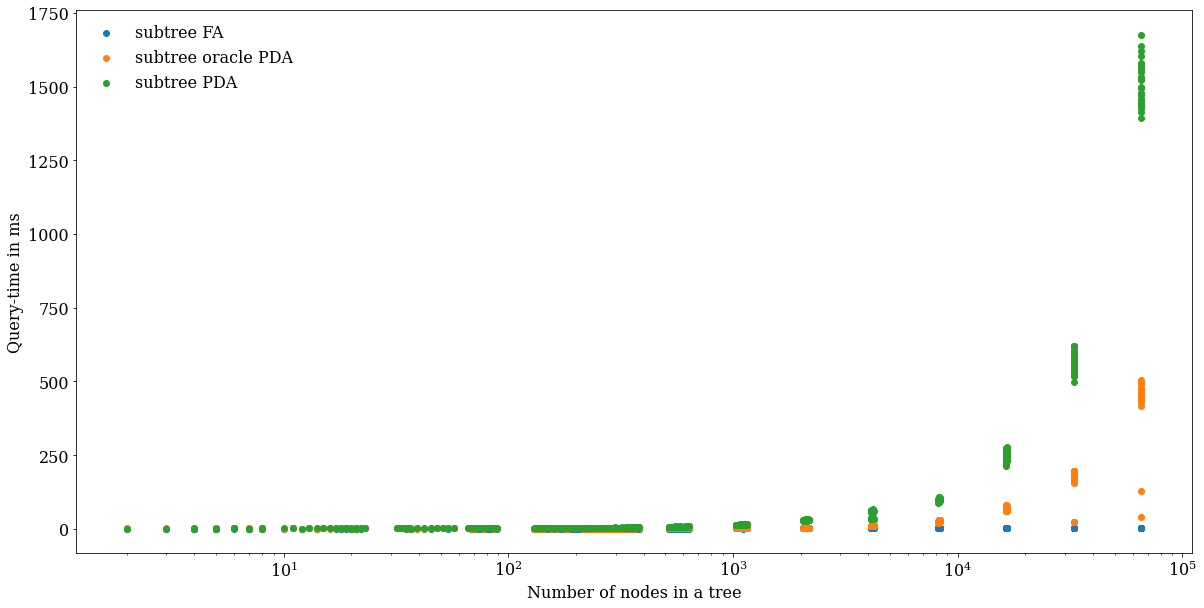

In [27]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes in a tree")
plt.ylabel("Query-time in ms")
plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["querytime"], label = 'subtree FA')
plt.scatter(tree_nodes_df['nodes'], oracle_df["querytime"], label = 'subtree oracle PDA')
plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["querytime"], label = 'subtree PDA')
plt.legend(frameon=False)
plt.xscale('log')
plt.show()

In [28]:
with PdfPages('qt-s.pdf') as export_pdf:
    plt.rc('font', size=16)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("Number of nodes in a tree")
    plt.ylabel("Query time in ms")
    plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["querytime"], label = 'subtree FA', alpha = 0.4)
    plt.scatter(tree_nodes_df['nodes'], oracle_df["querytime"], label = 'subtree oracle PDA', alpha = 0.4)
    plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["querytime"], label = 'subtree PDA', alpha = 0.4)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

## Graph for buildime time and depth.

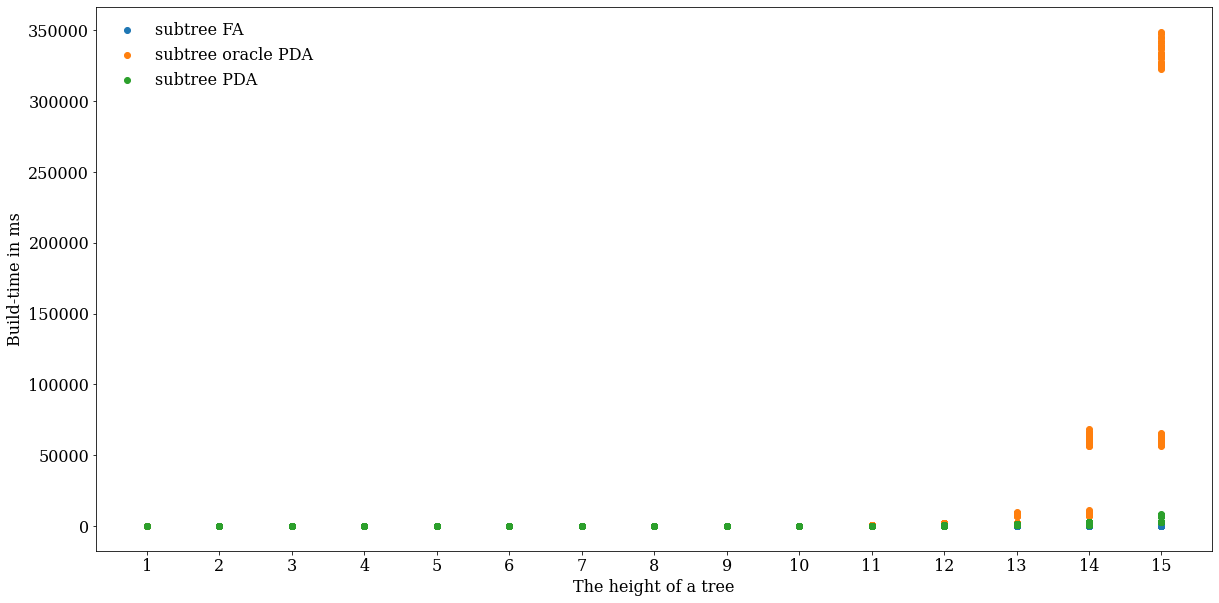

In [29]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The height of a tree")
plt.ylabel("Build-time in ms")
plt.scatter(tree_depth_df['depth'], subtreeFA_df["build-time"], label = 'subtree FA')
plt.scatter(tree_depth_df['depth'], oracle_df["build-time"], label = 'subtree oracle PDA')
plt.scatter(tree_depth_df['depth'], subtreePDA_df["build-time"], label = 'subtree PDA')
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(frameon=False)
plt.show()

In [30]:
with PdfPages('bt-h.pdf') as export_pdf:
    plt.rc('font', size=16)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Build time in ms")
    plt.scatter(tree_depth_df['depth'], subtreeFA_df["build-time"], label = 'subtree FA')
    plt.scatter(tree_depth_df['depth']+0.1, oracle_df["build-time"], label = 'subtree oracle PDA')
    plt.scatter(tree_depth_df['depth']+0.2, subtreePDA_df["build-time"], label = 'subtree PDA')
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.yscale ('log')
    plt.legend(frameon=False)
    export_pdf.savefig()
    plt.close()

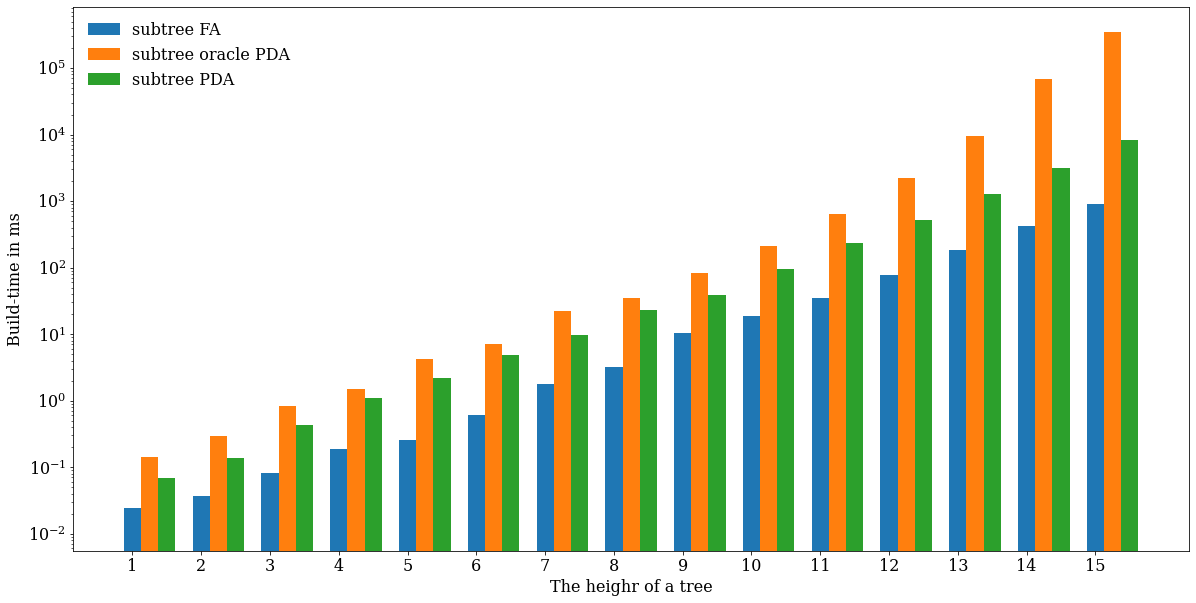

In [31]:
plt.figure(figsize=(20,10)) 
plt.xlabel("The heighr of a tree")
plt.ylabel("Build-time in ms")
plt.bar(tree_depth_df['depth'], subtreeFA_df["build-time"], label = 'subtree FA', width=0.25)
plt.bar(tree_depth_df['depth']+0.25, oracle_df["build-time"], label = 'subtree oracle PDA', width=0.25)
plt.bar(tree_depth_df['depth']+0.5, subtreePDA_df["build-time"], label = 'subtree PDA', width=0.25)
plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(frameon=False)
plt.yscale('log')
plt.show()

## Graph for buildime time and nodes.

In [32]:
with PdfPages('bt-s.pdf') as export_pdf:
    plt.rc('font', size=16)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("Number of nodes in a tree")
    plt.ylabel("Build time in ms")
    plt.scatter(tree_nodes_df['nodes'], subtreeFA_df["build-time"], label = 'subtree FA')
    plt.scatter(tree_nodes_df['nodes'], oracle_df["build-time"], label = 'subtree oracle PDA')
    plt.scatter(tree_nodes_df['nodes'], subtreePDA_df["build-time"], label = 'subtree PDA')
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

## Graph for memory consumption and build-time.

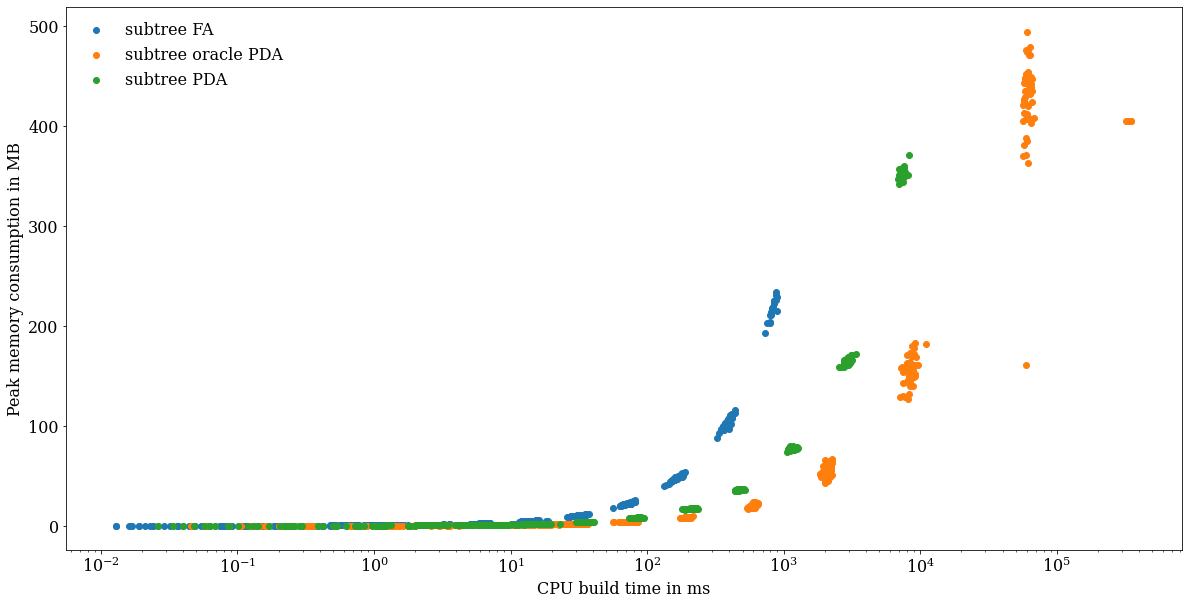

In [33]:
plt.figure(figsize=(20,10)) 
plt.xlabel("CPU build time in ms")
plt.ylabel("Peak memory consumption in MB")
plt.scatter(buildtime_subtreeFA_df["build-time"] , memory_subtreeFA_df["memory"], label = 'subtree FA')
plt.scatter(buildtime_oracle_df["build-time"]    , memory_oracle_df["memory"], label = 'subtree oracle PDA')
plt.scatter(buildtime_subtreePDA_df["build-time"], memory_subtreePDA_df["memory"], label = 'subtree PDA')
plt.legend(frameon=False)
plt.xscale('log')
plt.show()

## Graph for memory consumption and depth.

In [34]:
with PdfPages('mc-h.pdf') as export_pdf:
    plt.rc('font', size=16)
    plt.figure(figsize=(20,10)) 
    plt.xlabel("The height of a tree")
    plt.ylabel("Peak memory consumption in MB")
    plt.scatter(tree_depth_df['depth'], memory_subtreeFA_df["memory"], label = 'subtree FA')
    plt.scatter(tree_depth_df['depth'] +0.1, memory_oracle_df["memory"], label = 'subtree oracle PDA')
    plt.scatter(tree_depth_df['depth'] +0.2, memory_subtreePDA_df["memory"], label = 'subtree PDA')
    plt.xticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    plt.legend(frameon=False)
    plt.yscale('log')
    export_pdf.savefig()
    plt.close()

## Graph for memory consumption and number of nodes.

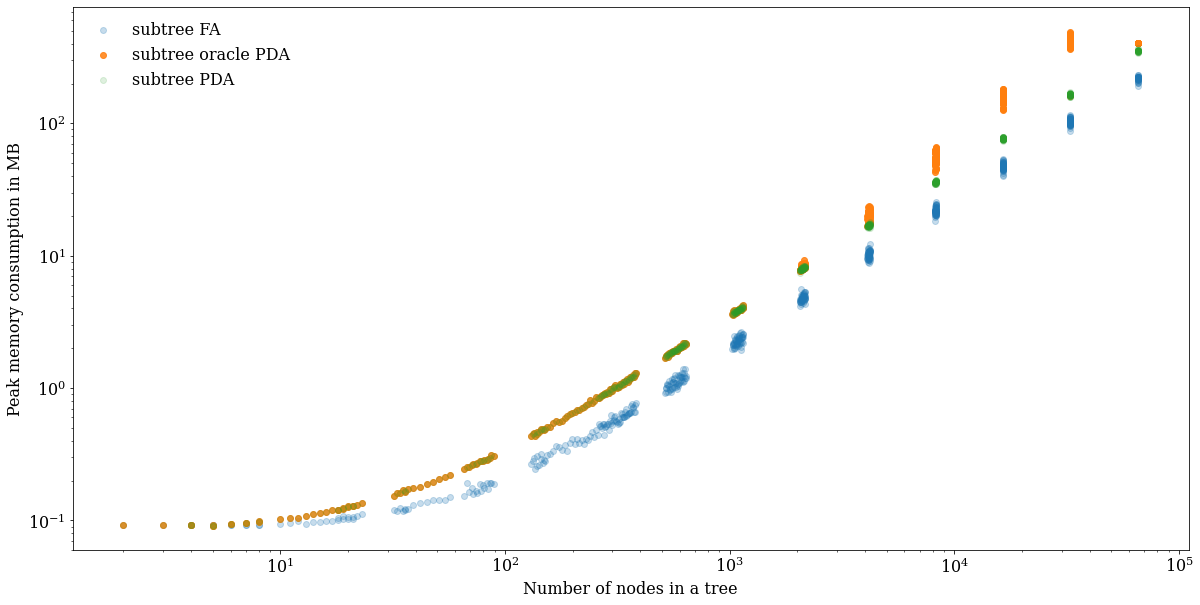

In [35]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes in a tree")
plt.ylabel("Peak memory consumption in MB")
plt.scatter(tree_nodes_df['nodes'], memory_subtreeFA_df["memory"], label = 'subtree FA', alpha = 0.25)
plt.scatter(tree_nodes_df['nodes'], memory_oracle_df["memory"], label = 'subtree oracle PDA', alpha = 0.85)
plt.scatter(tree_nodes_df['nodes'], memory_subtreePDA_df["memory"], label = 'subtree PDA', alpha = 0.15)
plt.legend(frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.show()

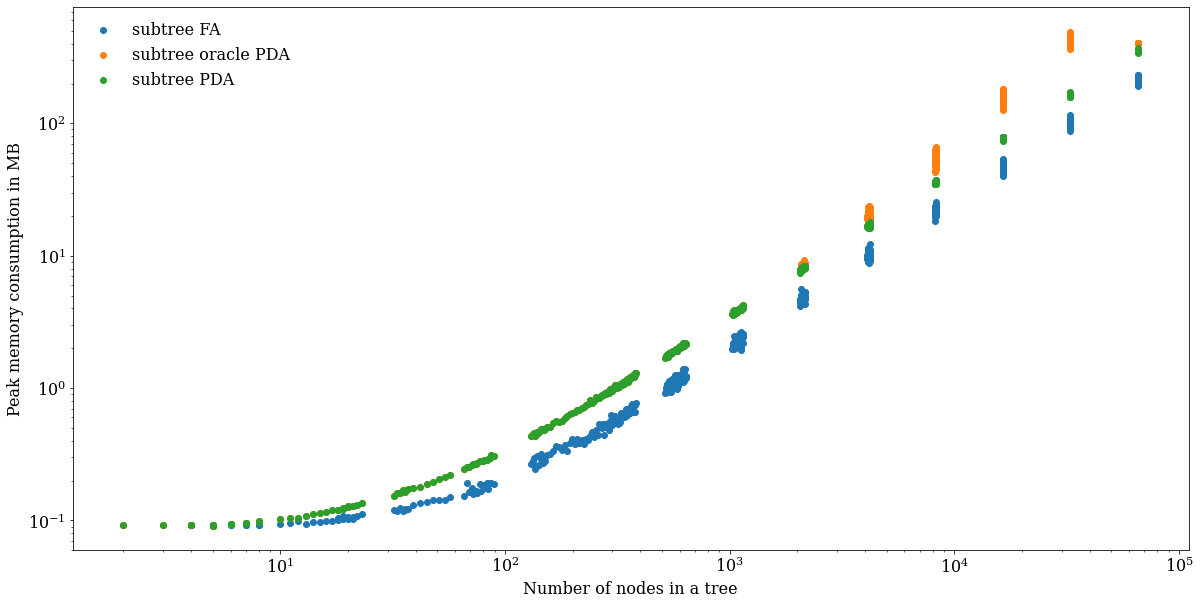

In [36]:
plt.figure(figsize=(20,10)) 
plt.xlabel("Number of nodes in a tree")
plt.ylabel("Peak memory consumption in MB")
plt.scatter(tree_nodes_df['nodes'], memory_subtreeFA_df["memory"], label = 'subtree FA')
plt.scatter(tree_nodes_df['nodes'], memory_oracle_df["memory"], label = 'subtree oracle PDA')
plt.scatter(tree_nodes_df['nodes'], memory_subtreePDA_df["memory"], label = 'subtree PDA')
plt.legend(frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.show()